In [10]:
from google.colab import files
files.upload()   # upload kaggle.json again


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sprathikk","key":"2a3aeb77aea72a365a710fdfbf132904"}'}

In [11]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [12]:
!kaggle datasets download -d techsash/waste-classification-data


Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
waste-classification-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
import zipfile

with zipfile.ZipFile("waste-classification-data.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/waste-classification-data")


In [14]:
!find /content/waste-classification-data -type d


/content/waste-classification-data
/content/waste-classification-data/dataset
/content/waste-classification-data/dataset/DATASET
/content/waste-classification-data/dataset/DATASET/TEST
/content/waste-classification-data/dataset/DATASET/TEST/R
/content/waste-classification-data/dataset/DATASET/TEST/O
/content/waste-classification-data/dataset/DATASET/TRAIN
/content/waste-classification-data/dataset/DATASET/TRAIN/R
/content/waste-classification-data/dataset/DATASET/TRAIN/O
/content/waste-classification-data/DATASET
/content/waste-classification-data/DATASET/TEST
/content/waste-classification-data/DATASET/TEST/R
/content/waste-classification-data/DATASET/TEST/O
/content/waste-classification-data/DATASET/TRAIN
/content/waste-classification-data/DATASET/TRAIN/R
/content/waste-classification-data/DATASET/TRAIN/O


In [19]:
import os

train_dir = "/content/waste-classification-data/dataset/DATASET/TRAIN"
test_dir = "/content/waste-classification-data/dataset/DATASET/TEST"

print("Train Folder Exists:", os.path.exists(train_dir))
print("Test Folder Exists:", os.path.exists(test_dir))


Train Folder Exists: True
Test Folder Exists: True


In [20]:
train_dir = "/content/waste-classification-data/DATASET/TRAIN"


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(2, activation='softmax')   # 2 classes → Organic, Recyclable
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
565/565 ━━━━━━━━━━━━━━━━━━━━ 514s 905ms/step - accuracy: 0.7708 - loss: 0.6600 - val_accuracy: 0.8101 - val_loss: 0.4026
Epoch 2/5
565/565 ━━━━━━━━━━━━━━━━━━━━ 495s 876ms/step - accuracy: 0.8390 - loss: 0.3998 - val_accuracy: 0.7784 - val_loss: 0.4475
Epoch 3/5
565/565 ━━━━━━━━━━━━━━━━━━━━ 498s 881ms/step - accuracy: 0.8594 - loss: 0.3460 - val_accuracy: 0.8449 - val_loss: 0.3688
Epoch 4/5
565/565 ━━━━━━━━━━━━━━━━━━━━ 496s 878ms/step - accuracy: 0.8657 - loss: 0.3193 - val_accuracy: 0.8236 - val_loss: 0.3929
Epoch 5/5
565/565 ━━━━━━━━━━━━━━━━━━━━ 489s 865ms/step - accuracy: 0.8839 - loss: 0.2916 - val_accuracy: 0.7979 - val_loss: 0.4945


In [26]:
model.save("/content/waste_cnn_model.h5")
print("Model saved successfully!")


Model saved successfully!


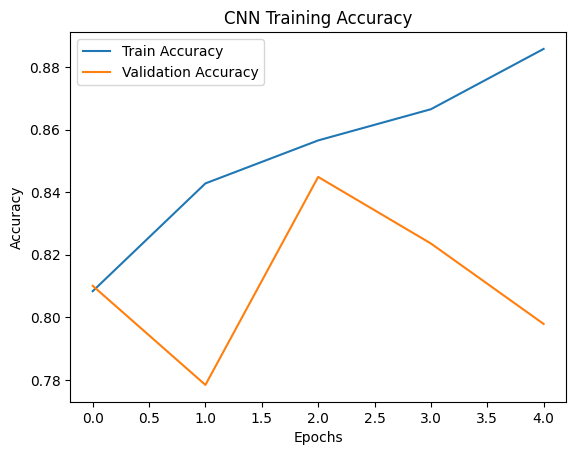

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("CNN Training Accuracy")

plt.savefig("/content/accuracy_plot.png")
plt.show()


In [28]:
model.save("/content/waste_cnn_model.h5")
print("Model saved successfully!")


Model saved successfully!


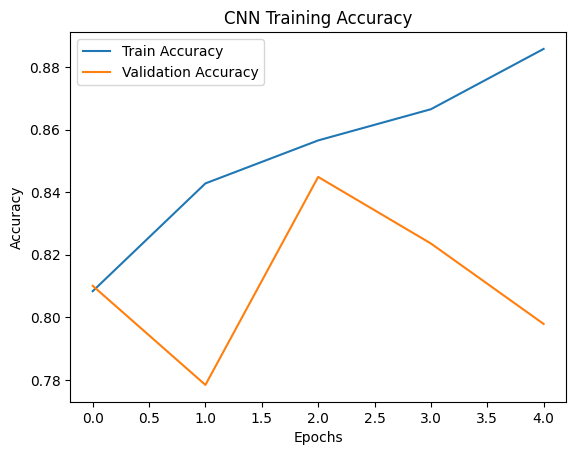

Plot saved as accuracy_plot.png


In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN Training Accuracy")

plt.savefig("/content/accuracy_plot.png")
plt.show()

print("Plot saved as accuracy_plot.png")


In [30]:
from google.colab import files
files.download('/content/waste_cnn_model.h5')
files.download('/content/accuracy_plot.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>